Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#importing necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the Dataset.

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# predicition of Loan status is the classification pblm.,
#Loan_Status is our Target Variable.

In [6]:
df.shape

(614, 13)

In [7]:
# we have 614 rows and 13 columns.

In [8]:
# To check columns name.
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# To check the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# we have 04 float(64) values,01 int64 and 08 object columns.
# I can see Null values in the columns,will analyze further.

In [11]:
#Information about columns:
# Loan Id: Gives unique loan no
# Gender: Gender of the Applicant
# Married: Marital status of the Applicant.
# Dependents:How many dependents are there for the applicant.
# Education:Educational qualification of the Applicant.
# Self_employed : whether he is self employed or not.
# Applicant Income: The total income of the Applicant.
# Coapplicant Income:if the applicant is having coapplicant,then their income is mentioned in this column
# Loan Amount: amount for which Loan is applied.
# Loan_Amount_Term:Tenure for paying the Loan.
# Credit _History:Applicant elligibility to repay the debts.
# Property_Area: Area of which the loan is applied for
# Loan_status: Whether loan is eligible for them.

# Data intergrity Check

In [12]:
# To Check Null Values.

df.isnull().sum()           

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.isnull().sum().sum()

149

In [14]:
# we have 149 Null values in the total Data set.


In [15]:
# To check for widespace,special characters in the Dataset.

In [16]:
df.isin(['NA','n/a','-',',','?',' ']).any().sum()

0

In [17]:
# There is No special Characters in the Dataset.

In [18]:
# To Check the Number of Unique values present in the Dataset.
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Null Values handling.

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
# since the Gender is categorical in nature,we replace the Nan Value with mode option.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [22]:
# after replacing checking the Value_counts
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [23]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [24]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])#replacing the Null values with mode option.

In [25]:
df['Dependents']# Rechecking after replaced.

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [26]:
df['Dependents'].value_counts()# Checking the Value counts.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
df['Self_Employed'].unique()# checking unique values

array(['No', 'Yes', nan], dtype=object)

In [28]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])# replacing the null values with mode.
df['Self_Employed']

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [29]:
df['Self_Employed'].value_counts()# rechecking the value counts after replacing Nan

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [31]:
# Since the values are continous in nature ,replacing the Null values with mean.

In [32]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [33]:
df['LoanAmount'].isnull().sum()

0

In [34]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [35]:
# Since the values are continous in nature ,replacing the Null values with mean.

In [36]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [37]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df['Loan_Amount_Term'].isnull().sum()

0

In [39]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [40]:
# Replacing the Null values with mode.

In [41]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [42]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [43]:
# after replacing the Null values,rechecking the same.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
df['Married']=df['Married'].fillna(0)
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [45]:
df.isnull().sum()# Rechecked all the columns,no null values present

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# statistical summary

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [47]:
# observations:
# The count is same on all the columns.
# The STD values is higher than mean ,which means skewness is present.
# The 75% and mzx is very high,which means outliers is present.

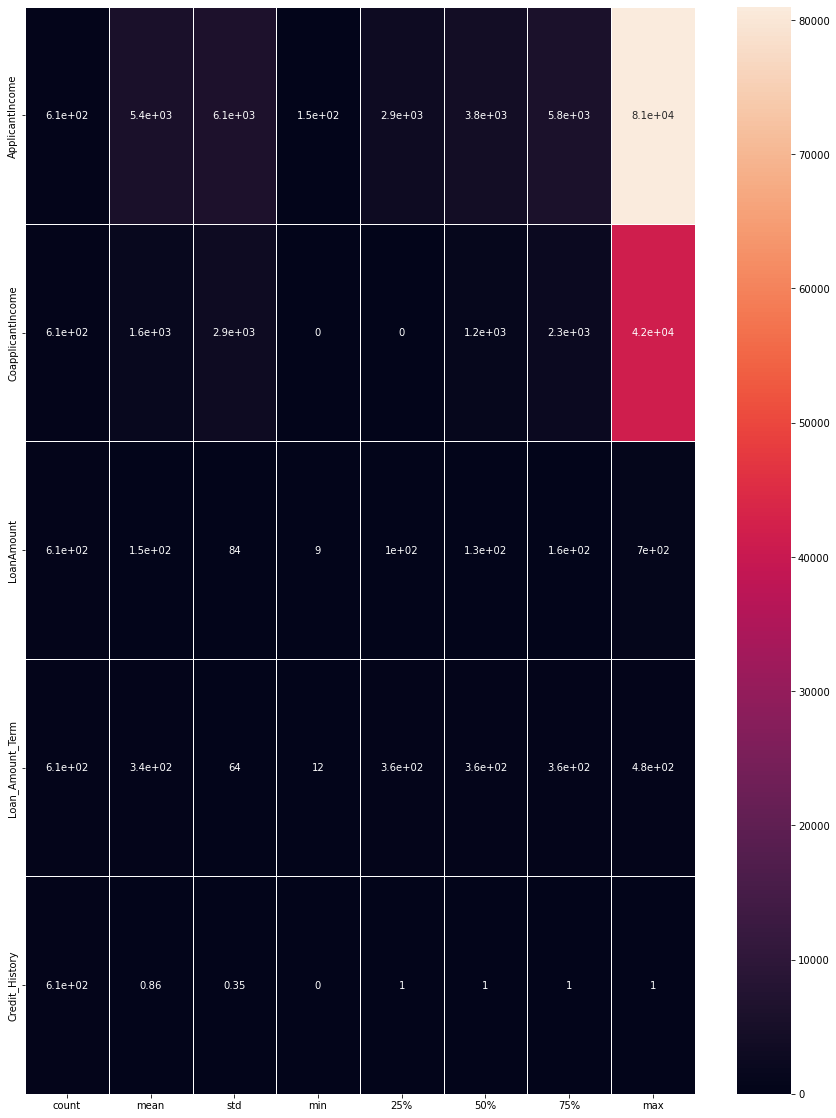

In [48]:
# Visualizing the statistical summary.
stat=df.describe().T
plt.figure(figsize=(15,20))
sns.heatmap(data=stat,annot=True,linewidths=0.5)
plt.show()

In [49]:
# applicant income and the coapplicant income the values are high in range.,will analyze further.

# Categorising the column before EDA.

In [50]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
df_numerical=df[['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].copy()

In [52]:
df_numerical

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001002,5849,0.0,146.412162,360.0
1,LP001003,4583,1508.0,128.000000,360.0
2,LP001005,3000,0.0,66.000000,360.0
3,LP001006,2583,2358.0,120.000000,360.0
4,LP001008,6000,0.0,141.000000,360.0
...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0
610,LP002979,4106,0.0,40.000000,180.0
611,LP002983,8072,240.0,253.000000,360.0
612,LP002984,7583,0.0,187.000000,360.0


In [53]:
df_cat=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']].copy()

In [54]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


# Univariate analysis

In [55]:
df_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      502
Female    112
Name: Gender, dtype: int64


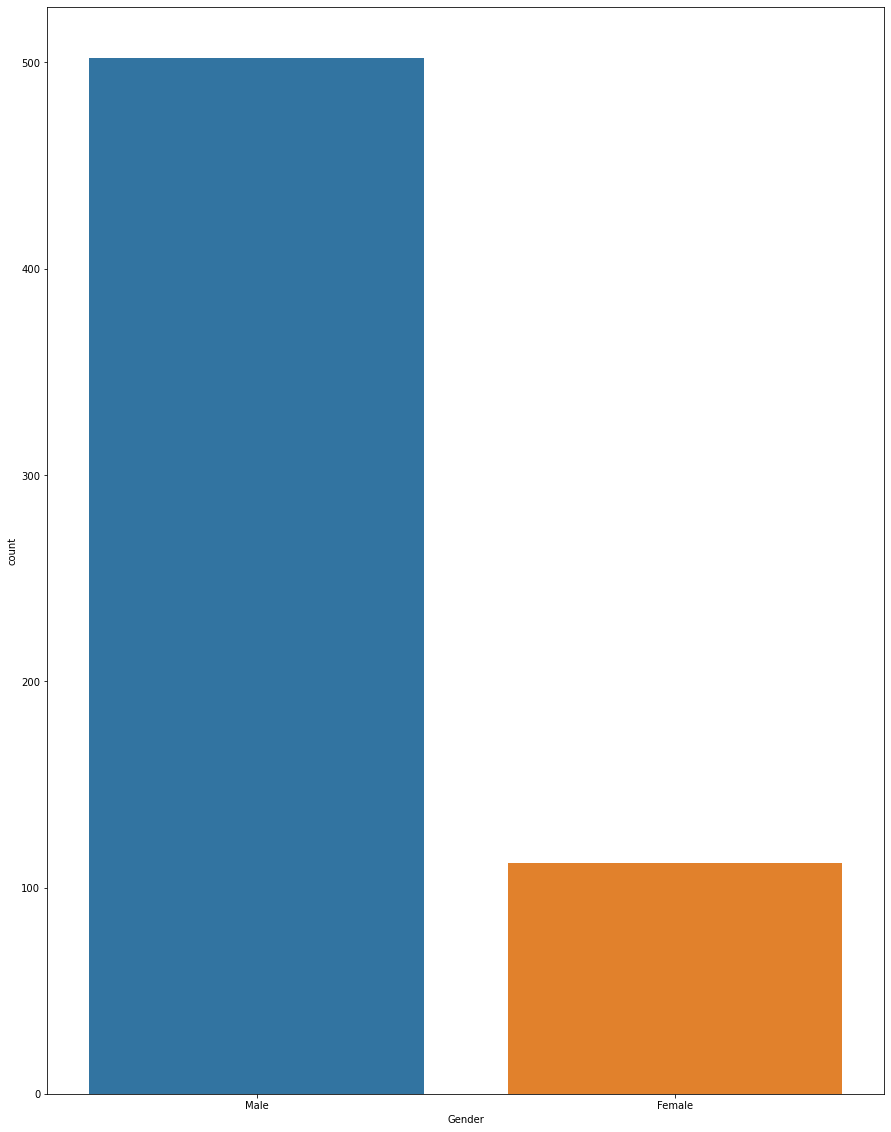

In [56]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Gender'])
print(df['Gender'].value_counts())

In [57]:
# male Applicant applied for loan higher than to female. 

Yes    398
No     213
0        3
Name: Married, dtype: int64


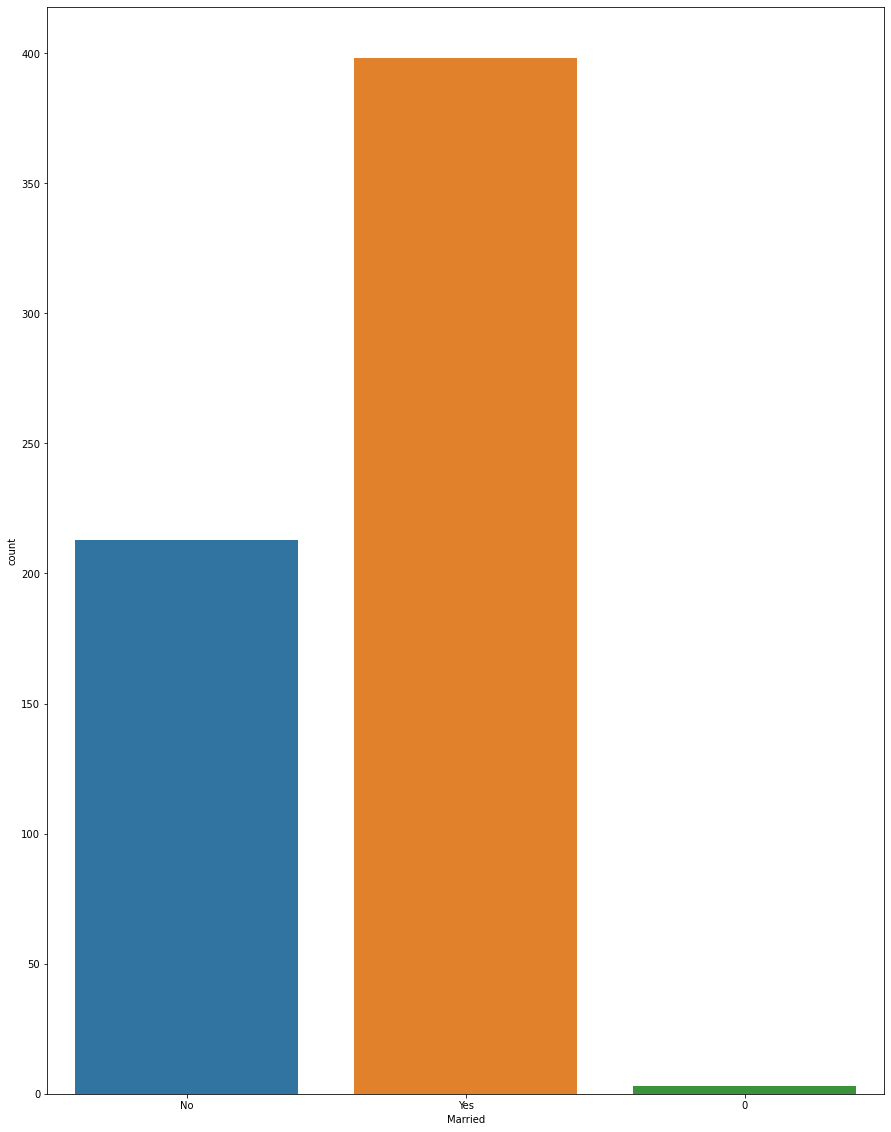

In [58]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Married'])
print(df['Married'].value_counts())

In [59]:
# married person is the highest to apply for loan

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


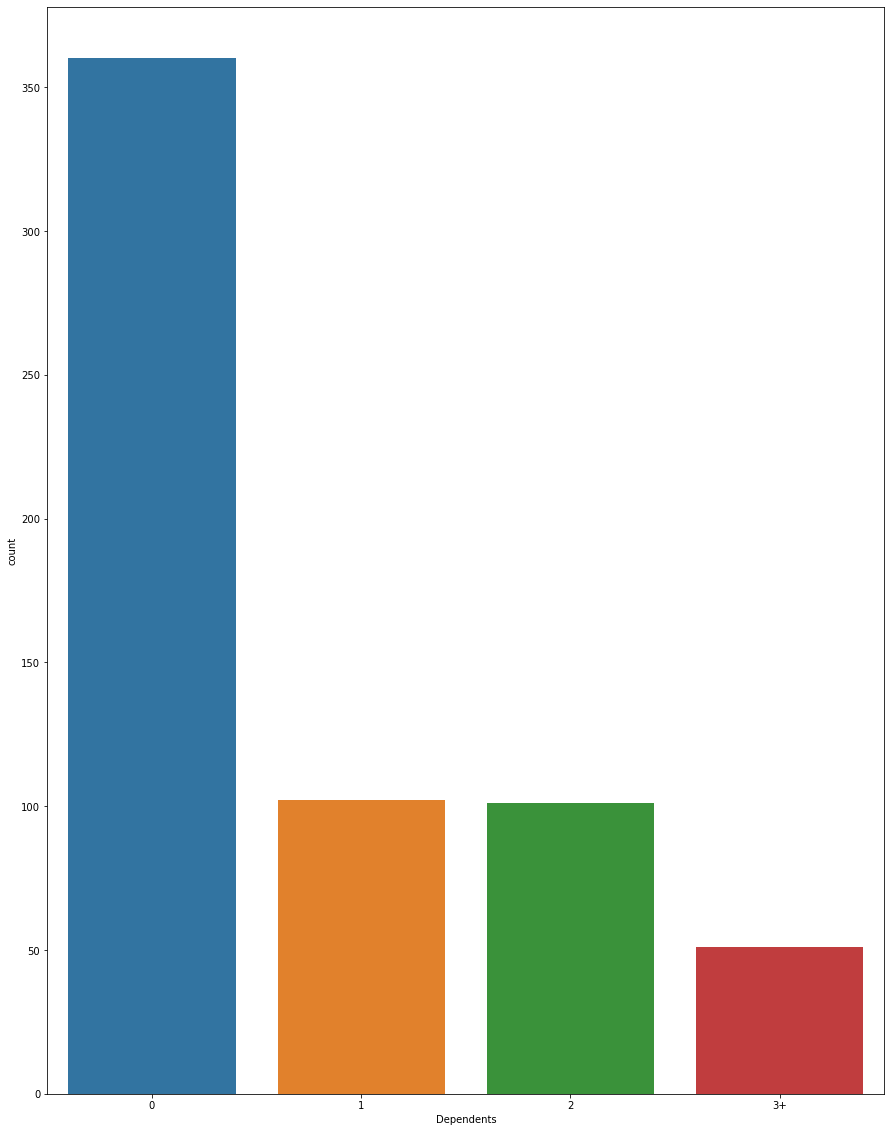

In [60]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Dependents'])
print(df['Dependents'].value_counts())

In [61]:
# people with zero dependents have applied for Loan in highest range.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


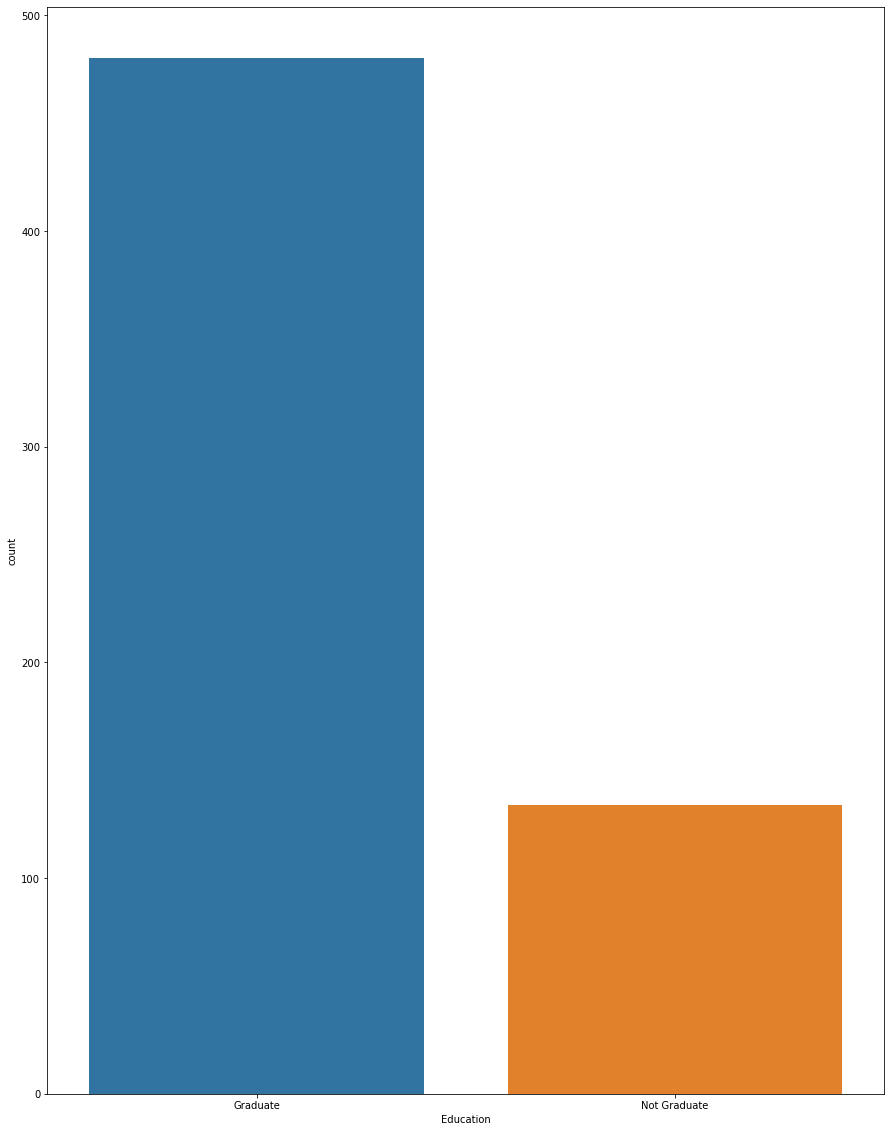

In [62]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Education'])
print(df['Education'].value_counts())

In [63]:
# Graduated people have applied more for Loan application 

No     532
Yes     82
Name: Self_Employed, dtype: int64


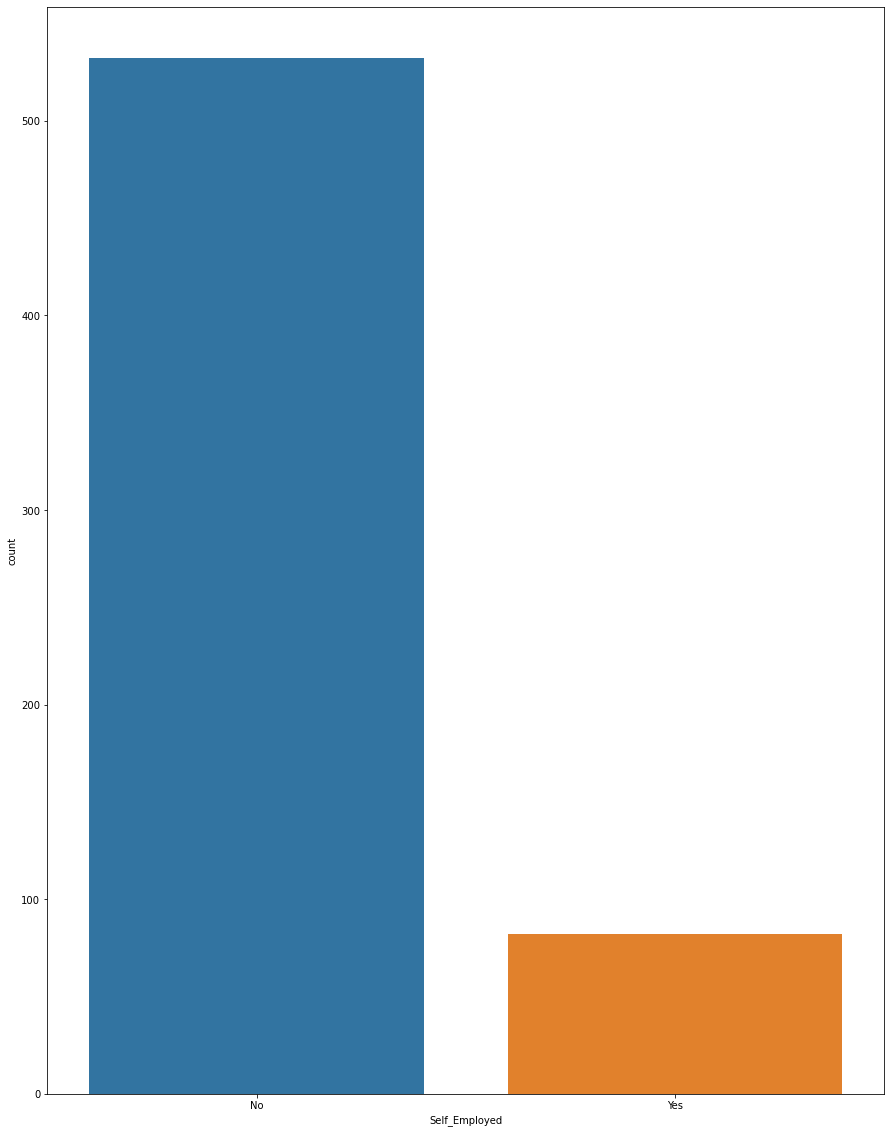

In [64]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Self_Employed'])
print(df['Self_Employed'].value_counts())

In [65]:
# people working with the organisations are applying more for Loan application.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


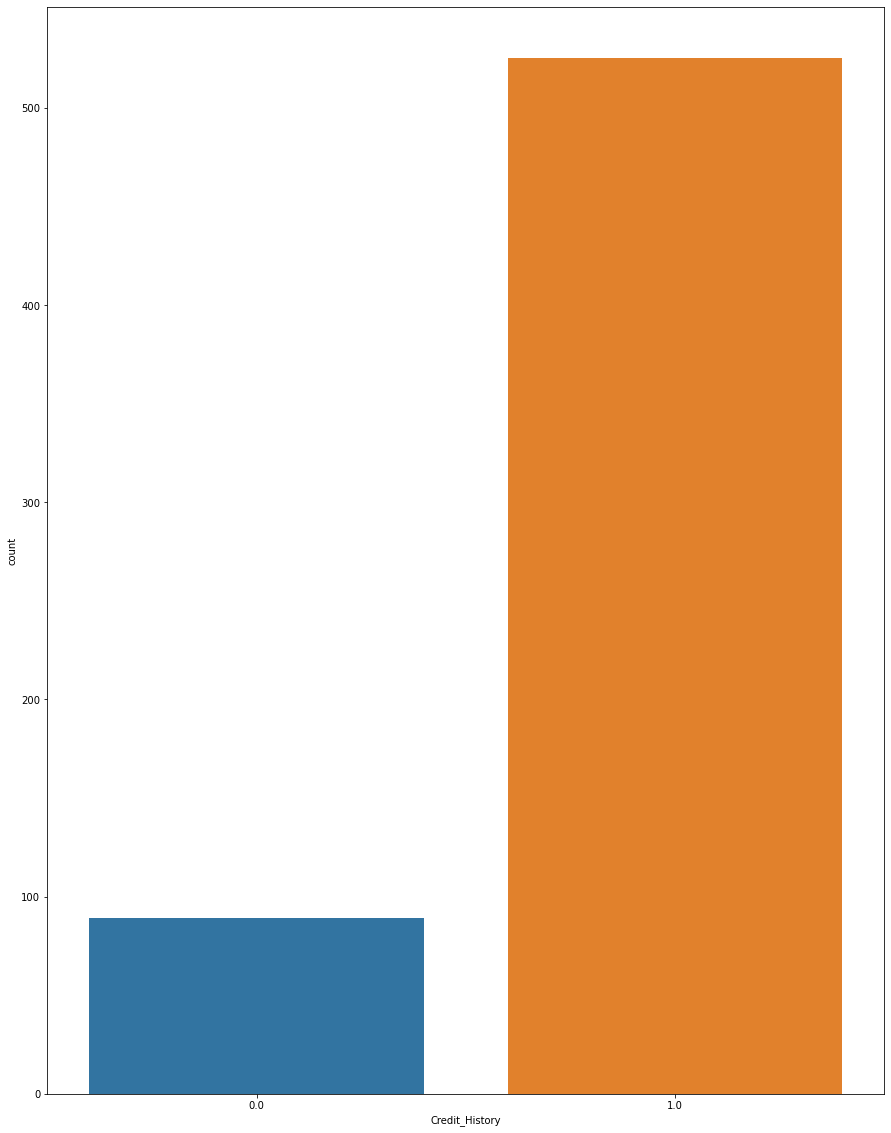

In [66]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Credit_History'])
print(df['Credit_History'].value_counts())

In [67]:
#most of the credit_history,they are eligible to repay

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


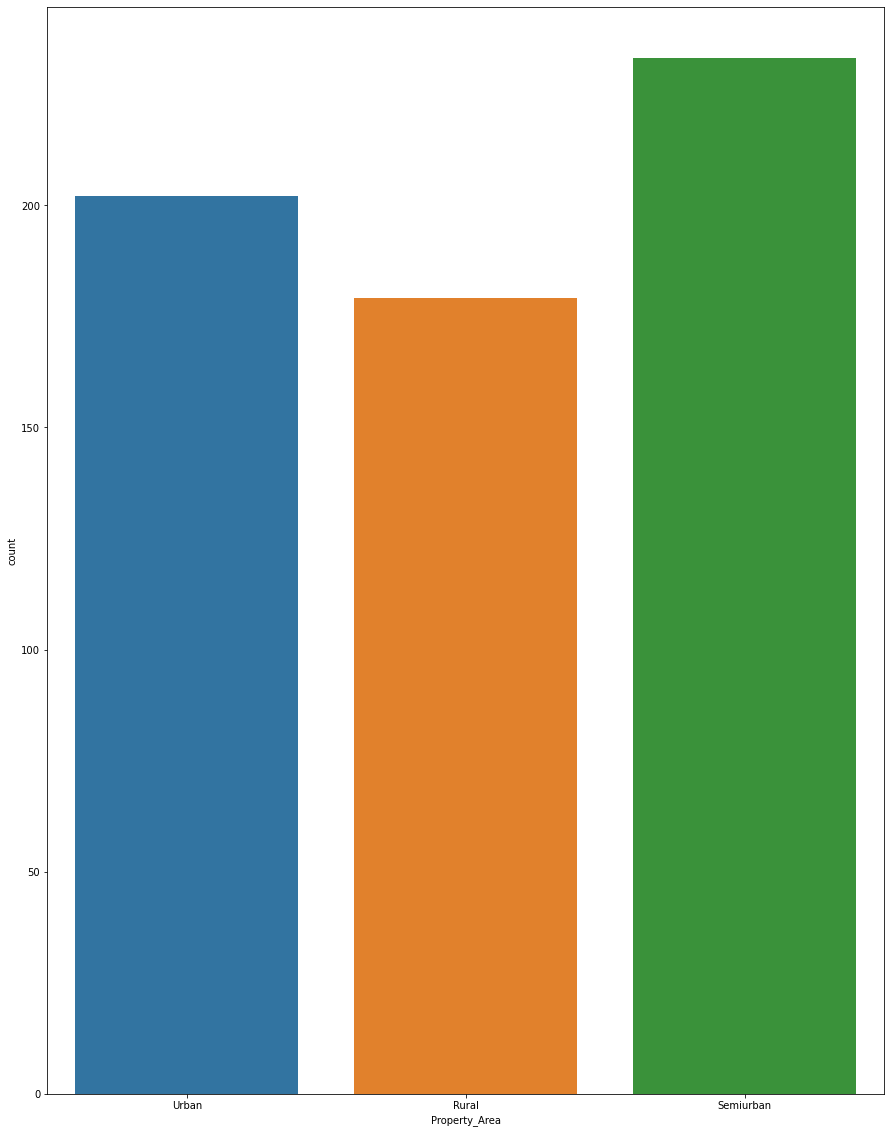

In [68]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Property_Area'])
print(df['Property_Area'].value_counts())

In [69]:
#Most of the people fromSemiurban has applied for more Loan application

# Visualizing the Target column

Y    422
N    192
Name: Loan_Status, dtype: int64


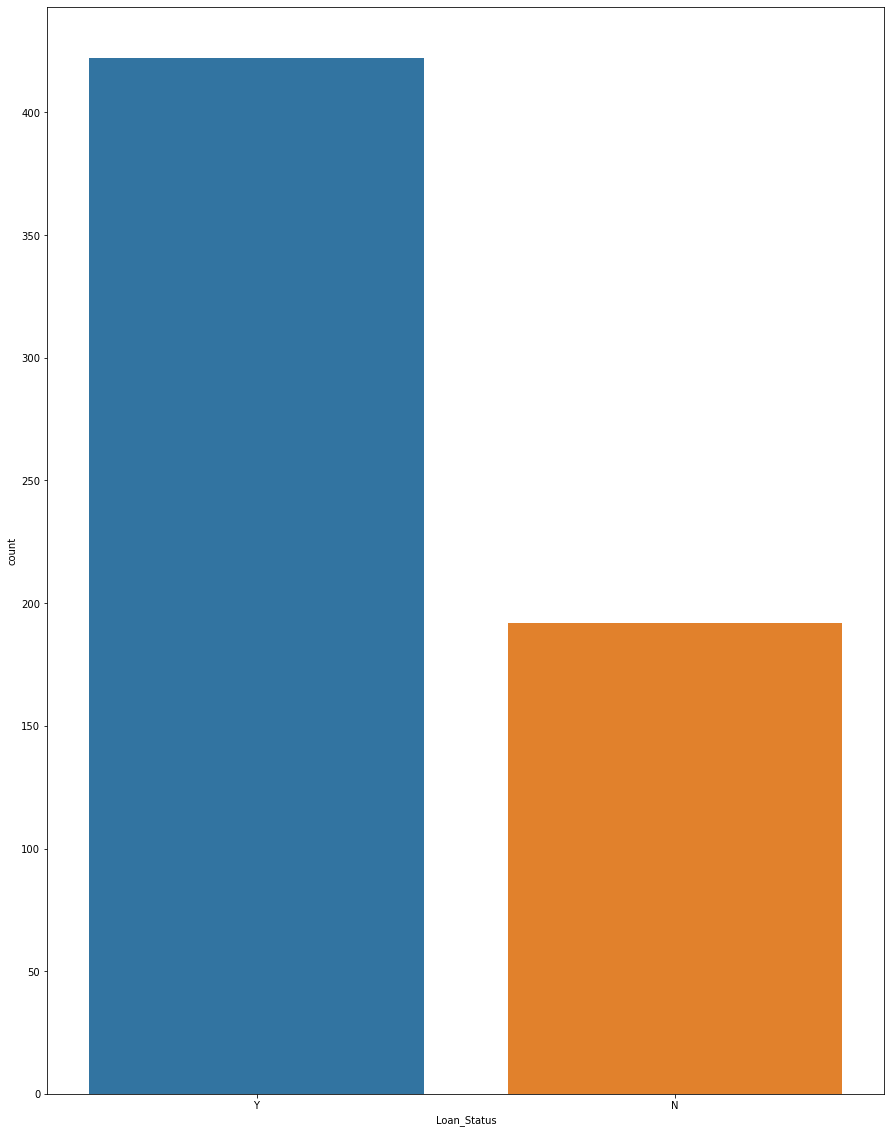

In [70]:
plt.figure(figsize=(15,20))
sns.countplot(x=df_cat['Loan_Status'])
print(df['Loan_Status'].value_counts())

In [71]:
# we have More ,Yes for Loan Application Status.

In [72]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)# replacing all yes as 1 and all no as 0.
df['Loan_Status']=df['Loan_Status'].replace('N',0) 
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [73]:
df_numerical.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

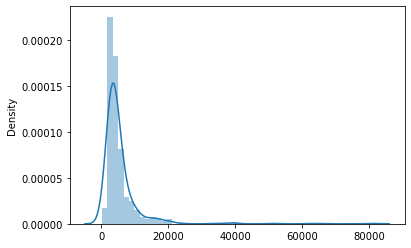

In [74]:
sns.distplot(x=df['ApplicantIncome'])
plt.show()

In [75]:
# follows normal distribution from 0 to 20000 and rightskewed.


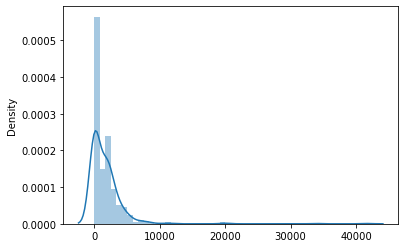

In [76]:
sns.distplot(x=df['CoapplicantIncome'])
plt.show()

In [77]:
#follows normal distribution from 0 to 10000 and then right skewness is present.

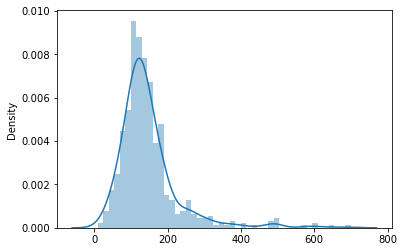

In [78]:
sns.distplot(x=df['LoanAmount'])
plt.show()

In [79]:
#follows normal distribution from 0 to 400 and then skewed.

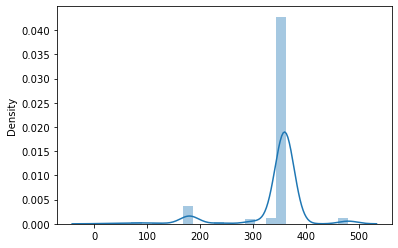

In [80]:
sns.distplot(x=df['Loan_Amount_Term'])
plt.show()

In [81]:
# follows normaldistribution from 300 to 400 days.

# Bivariate Analysis.

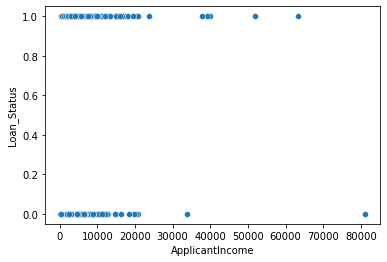

In [82]:
sns.scatterplot(x=df['ApplicantIncome'],y=df['Loan_Status'])
plt.show()

In [83]:
# ApplicantIncome increases and Loan status also more in Yes.

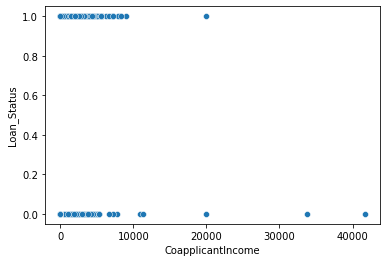

In [84]:
sns.scatterplot(x=df['CoapplicantIncome'],y=df['Loan_Status'])
plt.show()

In [85]:
# Coapplicant increases then more yes for Loan status.

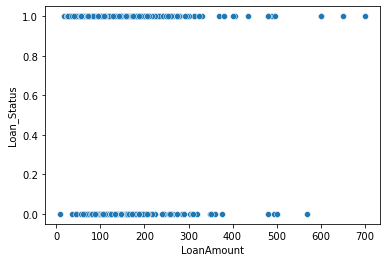

In [86]:
sns.scatterplot(x=df['LoanAmount'],y=df['Loan_Status'])
plt.show()

In [87]:
# Loan amount increases,most of the Data has received yes for Loan application.

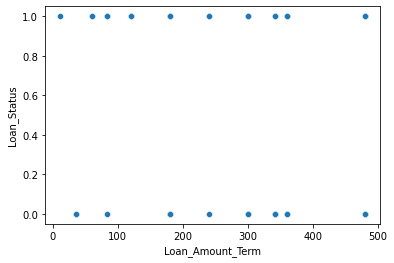

In [88]:
sns.scatterplot(x=df['Loan_Amount_Term'],y=df['Loan_Status'])
plt.show()

In [89]:
# here the Data is scattered,no relationshiplike.

# Multivariate Analysis.

In [90]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


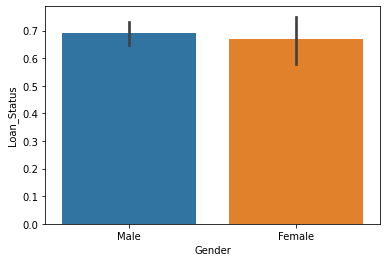

In [91]:
sns.barplot(x=df_cat['Gender'],y=df['Loan_Status'])
plt.show()

In [92]:
# male count is getting yes for Loan application status

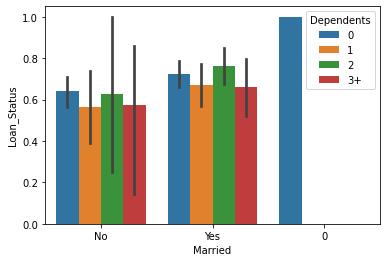

In [93]:
sns.barplot(x=df_cat['Married'],y=df['Loan_Status'],hue=df_cat['Dependents'])
plt.show()

In [94]:
# married people with 2 dependents have got more chances  yes for loan application.
# some people in 0 Married column have got yes for Loan Application


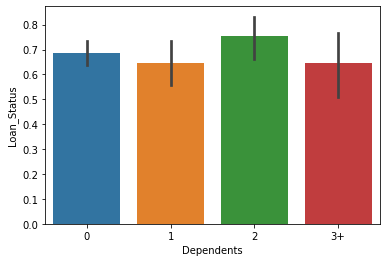

In [95]:
sns.barplot(x=df_cat['Dependents'],y=df['Loan_Status'])
plt.show()

In [96]:
#person with More dependents have got yes for Loan status.

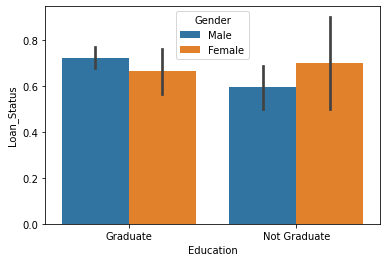

In [97]:
sns.barplot(x=df_cat['Education'],y=df['Loan_Status'],hue=df_cat['Gender'])
plt.show()

In [98]:
#Graduated Male has more chances for Yes Loan application

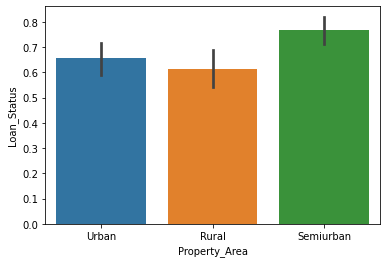

In [99]:
sns.barplot(x=df_cat['Property_Area'],y=df['Loan_Status'])
plt.show()

In [100]:
# Semiurban people have got yes more for Loan Applications.

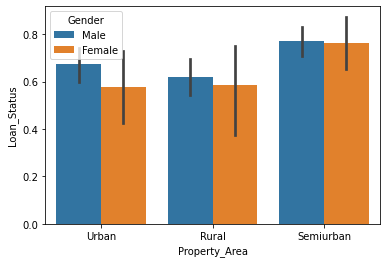

In [101]:
sns.barplot(x=df_cat['Property_Area'],y=df['Loan_Status'],hue=df_cat['Gender'])
plt.show()

In [102]:
# Semiurban male and Female also have got more chances for yes for LoanApplications.

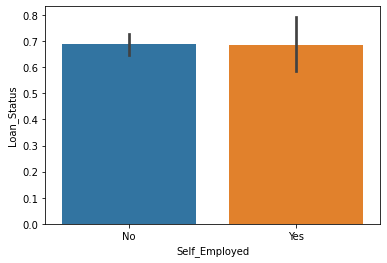

In [103]:
sns.barplot(x=df_cat['Self_Employed'],y=df['Loan_Status'])
plt.show()

In [104]:
# Self employed people category have got more chances for NO

# Encoding Categorical columns

In [105]:
df_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [106]:
df_cat.drop(columns='Loan_Status',axis=1,inplace=True)

In [107]:
df_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [110]:
le_gen=le.fit_transform(df_cat['Gender'])
le_gen

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [111]:
df_cat['Gender']=le_gen

In [112]:
df_cat['Married']=df_cat['Married'].astype('str')
df_cat['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [113]:
le_ma=le.fit_transform(df_cat['Married'])
le_ma

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,

In [114]:
df_cat['Married']=le_ma

In [115]:
le_dep=le.fit_transform(df_cat['Dependents'])
le_dep

array([0, 1, 0, 0, 0, 2, 0, 3, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0,
       0, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 3,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       0, 3, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       2, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1, 0,
       0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 1, 1, 0, 1, 0,

In [116]:
df_cat['Dependents']=le_dep

In [117]:
le_edu=le.fit_transform(df_cat['Education'])
le_edu

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [118]:
df_cat['Education']=le_edu

In [119]:
le_se=le.fit_transform(df_cat['Self_Employed'])
le_se

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
df_cat['Self_Employed']=le_se

In [121]:
le_ch=le.fit_transform(df_cat['Credit_History'])
le_ch

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [122]:
df_cat['Credit_History']=le_ch

In [123]:
le_pa=le.fit_transform(df_cat['Property_Area'])
le_pa

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [124]:
df_cat['Property_Area']=le_pa

In [125]:
# After Encoding all the columns:
df_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [126]:
df.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'])

In [139]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001002,5849,0.0,146.412162,360.0,1
1,LP001003,4583,1508.0,128.000000,360.0,0
2,LP001005,3000,0.0,66.000000,360.0,1
3,LP001006,2583,2358.0,120.000000,360.0,1
4,LP001008,6000,0.0,141.000000,360.0,1
...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1
610,LP002979,4106,0.0,40.000000,180.0,1
611,LP002983,8072,240.0,253.000000,360.0,1
612,LP002984,7583,0.0,187.000000,360.0,1


In [129]:
df.shape

(614, 6)

In [130]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,1,0,0,0,1,2
1,1,2,1,0,0,1,0
2,1,2,0,0,1,1,2
3,1,2,0,1,0,1,2
4,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...
609,0,1,0,0,0,1,0
610,1,2,3,0,0,1,0
611,1,2,1,0,0,1,2
612,1,2,2,0,0,1,2


In [141]:
new=pd.concat([df,df_cat],axis=1)
new

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001002,5849,0.0,146.412162,360.0,1,1,1,0,0,0,1,2
1,LP001003,4583,1508.0,128.000000,360.0,0,1,2,1,0,0,1,0
2,LP001005,3000,0.0,66.000000,360.0,1,1,2,0,0,1,1,2
3,LP001006,2583,2358.0,120.000000,360.0,1,1,2,0,1,0,1,2
4,LP001008,6000,0.0,141.000000,360.0,1,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1,0,1,0,0,0,1,0
610,LP002979,4106,0.0,40.000000,180.0,1,1,2,3,0,0,1,0
611,LP002983,8072,240.0,253.000000,360.0,1,1,2,1,0,0,1,2
612,LP002984,7583,0.0,187.000000,360.0,1,1,2,2,0,0,1,2


In [142]:
# removing unnecessary column,Loan_ID fromthe Dataset.
new.drop(columns='Loan_ID',axis=1,inplace=True)

In [143]:
new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5849,0.0,146.412162,360.0,1,1,1,0,0,0,1,2
1,4583,1508.0,128.000000,360.0,0,1,2,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1,1,2,0,0,1,1,2
3,2583,2358.0,120.000000,360.0,1,1,2,0,1,0,1,2
4,6000,0.0,141.000000,360.0,1,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1,0,1,0,0,0,1,0
610,4106,0.0,40.000000,180.0,1,1,2,3,0,0,1,0
611,8072,240.0,253.000000,360.0,1,1,2,1,0,0,1,2
612,7583,0.0,187.000000,360.0,1,1,2,2,0,0,1,2


In [144]:
new.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
Credit_History         int64
Property_Area          int32
dtype: object

# checking coefficient corelation

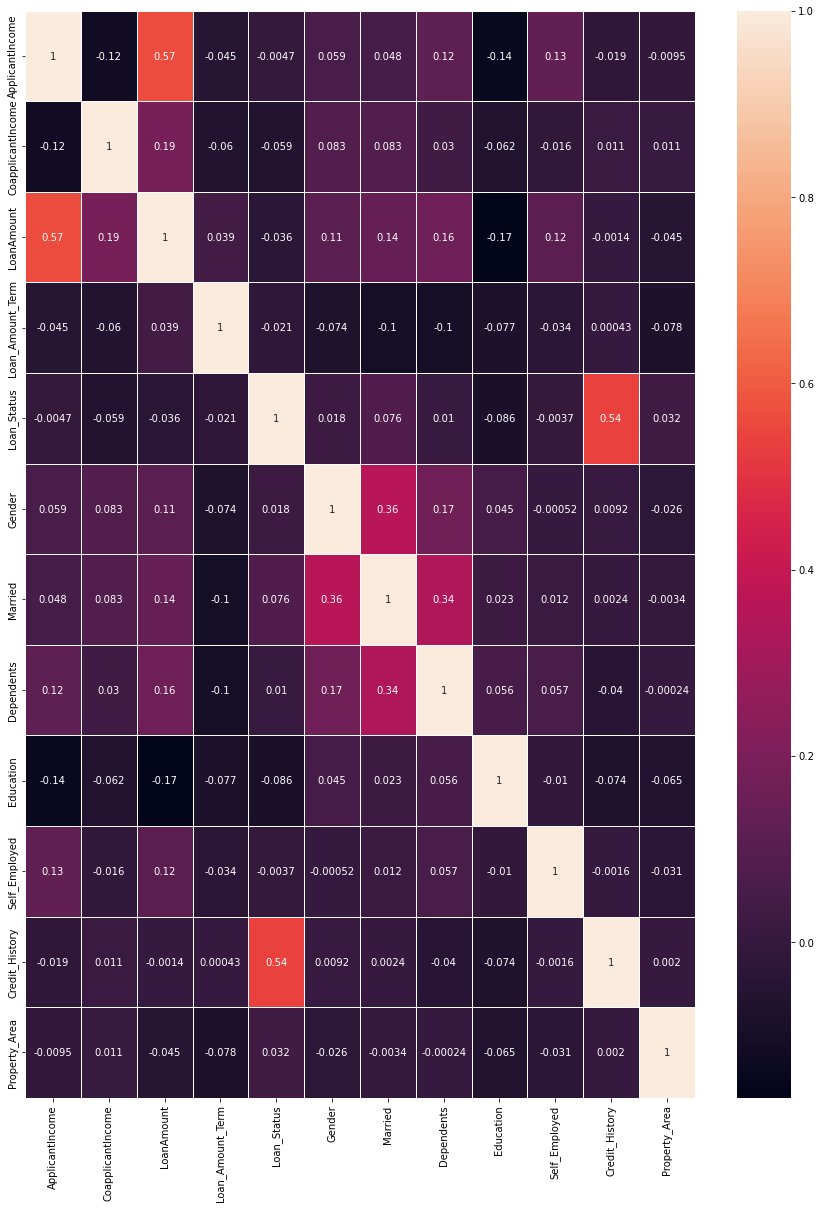

In [145]:
corr=new.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [147]:
corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.075547
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

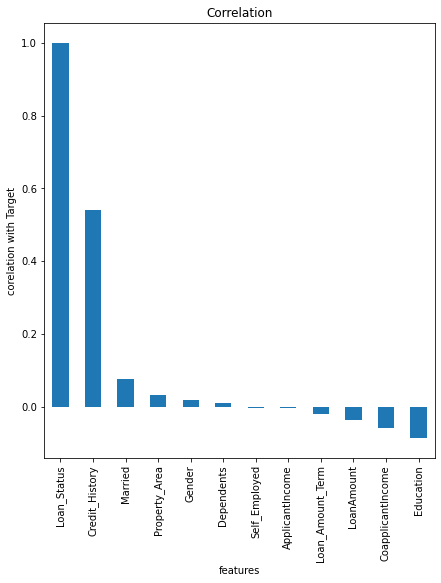

In [148]:
plt.figure(figsize=(7,8))
corr['Loan_Status'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [149]:
# The columns gender,dependents,Selfemployed,ApplicantIncome,Loan_amount_Term,Loan_amount,Property_Area 
#is giving very less value to the Target.

# Selecting best Features using Kbest method.

In [150]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [151]:
x=new.drop(columns='Loan_Status',axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5849,0.0,146.412162,360.0,1,1,0,0,0,1,2
1,4583,1508.0,128.000000,360.0,1,2,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1,2,0,0,1,1,2
3,2583,2358.0,120.000000,360.0,1,2,0,1,0,1,2
4,6000,0.0,141.000000,360.0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,0,1,0,0,0,1,0
610,4106,0.0,40.000000,180.0,1,2,3,0,0,1,0
611,8072,240.0,253.000000,360.0,1,2,1,0,0,1,2
612,7583,0.0,187.000000,360.0,1,2,2,0,0,1,2


In [152]:
y=new['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [153]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,0.013574,ApplicantIncome
1,2.151457,CoapplicantIncome
2,0.812667,LoanAmount
3,0.269339,Loan_Amount_Term
4,0.198059,Gender
5,3.512902,Married
6,0.062665,Dependents
7,4.547685,Education
8,0.008380,Self_Employed
9,252.652090,Credit_History


In [154]:
best_score.sort_values('score',ascending=False)

,score,columnname
9,252.652090,Credit_History
7,4.547685,Education
5,3.512902,Married
1,2.151457,CoapplicantIncome
2,0.812667,LoanAmount
10,0.631733,Property_Area
3,0.269339,Loan_Amount_Term
4,0.198059,Gender
6,0.062665,Dependents
0,0.013574,ApplicantIncome


In [155]:
#gender,dependents,Selfemployed,ApplicantIncome,Loan_amount_Term,Loan_amount,property_Area 
#columns can be removed from the dataset as they are scoring less as well the correlation to target is also less.

In [156]:
new.drop(columns=['LoanAmount','Property_Area','Loan_Amount_Term','Gender','Dependents','ApplicantIncome','Self_Employed'],axis=1,inplace=True)

In [157]:
new

,CoapplicantIncome,Loan_Status,Married,Education,Credit_History
0,0.0,1,1,0,1
1,1508.0,0,2,0,1
2,0.0,1,2,0,1
3,2358.0,1,2,1,1
4,0.0,1,1,0,1
...,...,...,...,...,...
609,0.0,1,1,0,1
610,0.0,1,2,0,1
611,240.0,1,2,0,1
612,0.0,1,2,0,1


# outliers.

CoapplicantIncome       AxesSubplot(0.125,0.657941;0.352273x0.222059)
Loan_Status          AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Married                 AxesSubplot(0.125,0.391471;0.352273x0.222059)
Education            AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Credit_History             AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

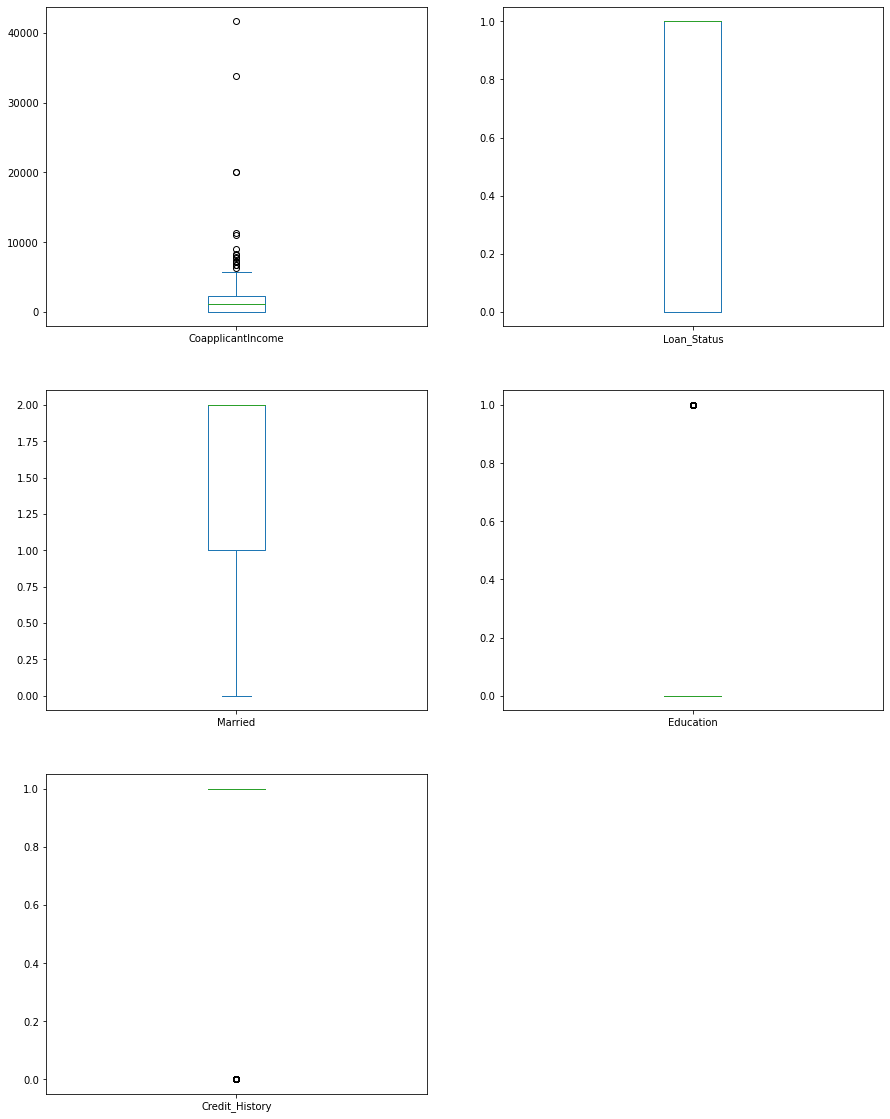

In [158]:
new.plot(kind ='box', subplots =True , layout =(3,2), figsize = (15,20))

In [159]:
from scipy.stats import zscore

In [160]:
z = np.abs(zscore(new))
z

,CoapplicantIncome,Loan_Status,Married,Education,Credit_History
0,0.554487,0.674519,1.315286,0.528362,0.411733
1,0.038732,1.482537,0.729235,0.528362,0.411733
2,0.554487,0.674519,0.729235,0.528362,0.411733
3,0.251980,0.674519,0.729235,1.892641,0.411733
4,0.554487,0.674519,1.315286,0.528362,0.411733
...,...,...,...,...,...
609,0.554487,0.674519,1.315286,0.528362,0.411733
610,0.554487,0.674519,0.729235,0.528362,0.411733
611,0.472404,0.674519,0.729235,0.528362,0.411733
612,0.554487,0.674519,0.729235,0.528362,0.411733


In [161]:
df_new=new[(z<3).all(axis=1)]
df_new

,CoapplicantIncome,Loan_Status,Married,Education,Credit_History
0,0.0,1,1,0,1
1,1508.0,0,2,0,1
2,0.0,1,2,0,1
3,2358.0,1,2,1,1
4,0.0,1,1,0,1
...,...,...,...,...,...
609,0.0,1,1,0,1
610,0.0,1,2,0,1
611,240.0,1,2,0,1
612,0.0,1,2,0,1


In [162]:
new.shape

(614, 5)

In [163]:
df_new.shape

(605, 5)

In [164]:
DataLoss=(614-605)/614*100

In [166]:
DataLoss

1.4657980456026058

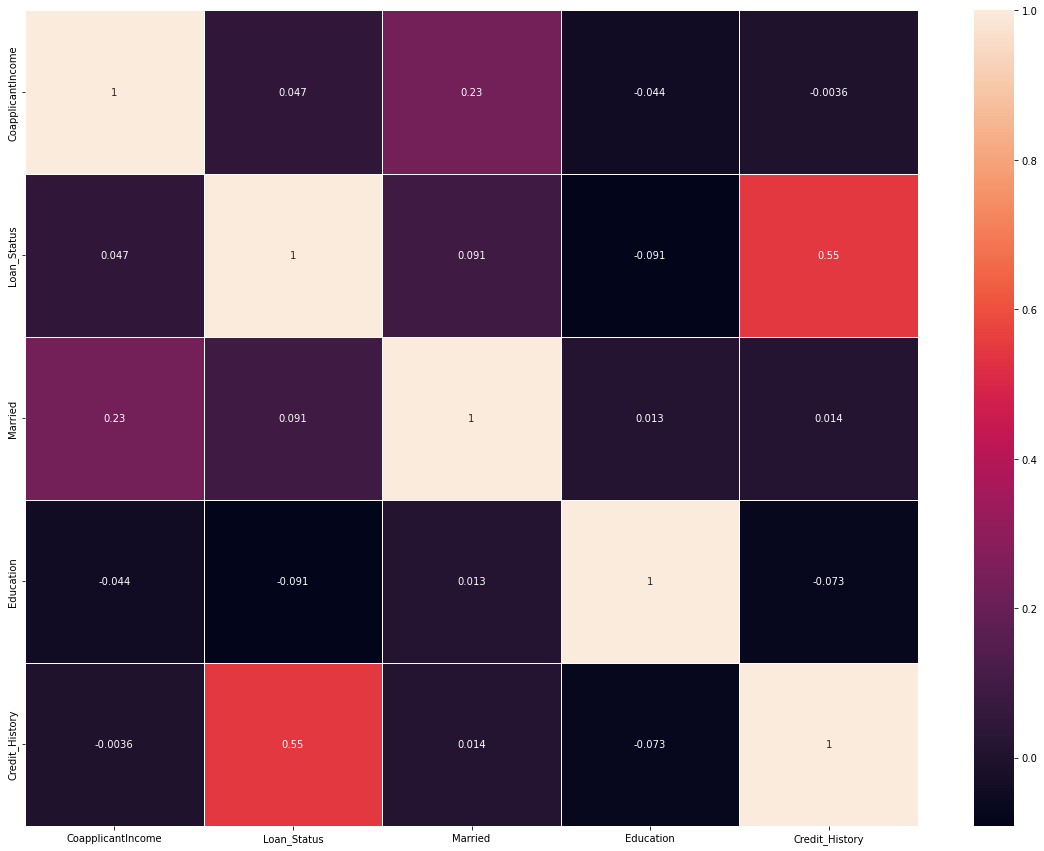

In [167]:
corr=df_new.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot= True,linewidths= 0.5)
plt.show()

# Skewness check 

In [168]:
x=df_new.drop(columns=['Loan_Status'])
x

,CoapplicantIncome,Married,Education,Credit_History
0,0.0,1,0,1
1,1508.0,2,0,1
2,0.0,2,0,1
3,2358.0,2,1,1
4,0.0,1,0,1
...,...,...,...,...
609,0.0,1,0,1
610,0.0,2,0,1
611,240.0,2,0,1
612,0.0,2,0,1


In [169]:
y=df_new['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 605, dtype: int64

In [170]:
x.skew()          #we will use Transformation Techniques.

CoapplicantIncome    1.373770
Married             -0.643936
Education            1.344763
Credit_History      -2.016274
dtype: float64

In [176]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pwr=pt.fit_transform(x)
x_new=pd.DataFrame(data=pwr,columns=x.columns)
x_new

,CoapplicantIncome,Married,Education,Credit_History
0,-1.098379,-1.371478,-0.533386,0.412568
1,0.769427,0.729140,-0.533386,0.412568
2,-1.098379,0.729140,-0.533386,0.412568
3,0.912537,0.729140,1.874813,0.412568
4,-1.098379,-1.371478,-0.533386,0.412568
...,...,...,...,...
600,-1.098379,-1.371478,-0.533386,0.412568
601,-1.098379,0.729140,-0.533386,0.412568
602,0.220847,0.729140,-0.533386,0.412568
603,-1.098379,0.729140,-0.533386,0.412568


In [177]:
x_new.skew()

CoapplicantIncome   -0.151661
Married             -0.643936
Education            1.344763
Credit_History      -2.016274
dtype: float64

In [178]:
from sklearn.preprocessing import QuantileTransformer  # Using Quantile Transformer

In [179]:
qt=QuantileTransformer()
qta=pt.fit_transform(x)
x_qua=pd.DataFrame(data=qta,columns=x.columns)
x_qua

,CoapplicantIncome,Married,Education,Credit_History
0,-1.098379,-1.371478,-0.533386,0.412568
1,0.769427,0.729140,-0.533386,0.412568
2,-1.098379,0.729140,-0.533386,0.412568
3,0.912537,0.729140,1.874813,0.412568
4,-1.098379,-1.371478,-0.533386,0.412568
...,...,...,...,...
600,-1.098379,-1.371478,-0.533386,0.412568
601,-1.098379,0.729140,-0.533386,0.412568
602,0.220847,0.729140,-0.533386,0.412568
603,-1.098379,0.729140,-0.533386,0.412568


In [180]:
x_qua.skew()

CoapplicantIncome   -0.151661
Married             -0.643936
Education            1.344763
Credit_History      -2.016274
dtype: float64

In [185]:
# using PowerTransform features to build the Model.

In [186]:
x_new.shape

(605, 4)

In [187]:
y.shape

(605,)

# Multicollinearity using VIF

In [ ]:
# since we applied power_Transformer feature,scalar is already done as default,hencing checking VIF straight.

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [190]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['columns']=x_new.columns
vif

,VIF,columns
0,1.123304,CoapplicantIncome
1,1.121184,Married
2,1.007654,Education
3,1.005723,Credit_History


In [191]:
# No Multicollinearity is present so we will build the Model further.

In [192]:
y.value_counts()

1    418
0    187
Name: Loan_Status, dtype: int64

In [193]:
# since the Value count is not much differing,we will continue without sampling procedures.

# Model Building

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [196]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("The Model Performs well")
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

The Model Performs well
At Random State 4
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 22
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 35
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 41
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 47
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 76
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 85
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
At Random State 93
The Training score is: 81.45695364238411
The Test Score is : 80.92105263157895
The Model Performs well
A

In [197]:
# Choosing Random_state=993

In [198]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=993)

In [199]:
lr.fit(x_train,y_train)

LogisticRegression()

In [200]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [201]:
print(accuracy_score(y_test,pred_test)*100)
print("\n\n",classification_report(y_test,pred_test))
print("\n\n",confusion_matrix(y_test,pred_test))

80.92105263157895


               precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.81      0.96      0.88       108

    accuracy                           0.81       152
   macro avg       0.82      0.70      0.72       152
weighted avg       0.81      0.81      0.79       152



 [[ 19  25]
 [  4 104]]


# Cross_validation.

In [202]:
from sklearn.model_selection import cross_val_score

In [203]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x_new,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)

[0.79207921 0.83443709]
At CV Fold,: 2
Cross Valid Score is: 81.32581470067537
Accuracy Score is : 80.92105263157895
[0.8019802  0.7970297  0.84079602]
At CV Fold,: 3
Cross Valid Score is: 81.32686402968655
Accuracy Score is : 80.92105263157895
[0.80263158 0.78145695 0.83443709 0.83443709]
At CV Fold,: 4
Cross Valid Score is: 81.32406761937958
Accuracy Score is : 80.92105263157895
[0.81818182 0.7768595  0.78512397 0.85950413 0.82644628]
At CV Fold,: 5
Cross Valid Score is: 81.32231404958678
Accuracy Score is : 80.92105263157895
[0.83168317 0.77227723 0.77227723 0.82178218 0.84158416 0.84      ]
At CV Fold,: 6
Cross Valid Score is: 81.32673267326732
Accuracy Score is : 80.92105263157895
[0.83908046 0.77011494 0.77011494 0.79069767 0.86046512 0.81395349
 0.84883721]
At CV Fold,: 7
Cross Valid Score is: 81.33234047428111
Accuracy Score is : 80.92105263157895
[0.82894737 0.78947368 0.76315789 0.78947368 0.78947368 0.86666667
 0.8        0.88      ]
At CV Fold,: 8
Cross Valid Score is: 81.3

In [204]:
# Observation:
# Choosing Cross Fold,cv=4 where Cross Valid Score and Accuracy Score is having less difference.

In [205]:
print("The Cross Valid Score is :",lsc_score*100)
print("The Training Score for lr is ",accuracy_score(y_train,pred_train)*100)
print("The Accuracy Score for lr is :",accuracy_score(y_test,pred_test)*100)
print ("The Difference between the Score is ",(lsc_score*100-accuracy_score(y_test,pred_test)*100))

The Cross Valid Score is : 81.32133450395084
The Training Score for lr is  81.45695364238411
The Accuracy Score for lr is : 80.92105263157895
The Difference between the Score is  0.4002818723718917


# # Training the Model with different algorithms.

In [206]:
# Defining a Function for getting Model score:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x_new,y,cv=4)
    cvc=cvs.mean()
    print("The Model Name is ",algorithm)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",(cvc*100-accuracy_score(y_test,pred_algo_test)*100))
    

In [207]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [208]:
dt=DecisionTreeClassifier()

In [209]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier()
The Accuracy score of the Model Training Data: 88.52097130242825
The Accuracy score of the Model Test Data: 77.63157894736842
The Cross Valid Score of the Algorithm: 73.2169309864064
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.67      0.45      0.54        44
           1       0.80      0.91      0.85       108

    accuracy                           0.78       152
   macro avg       0.73      0.68      0.70       152
weighted avg       0.76      0.78      0.76       152

The Confusion Matrix is : [[20 24]
 [10 98]]
The Difference between Cross Val score and Accuracy score is:  -4.414647960962029


# Using gridsearch CV

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
parameters={'criterion':["gini", "entropy"],'max_depth':range(2,5),'min_samples_split':[2,3,4]}

In [225]:
grd_dt=GridSearchCV(dt,param_grid=parameters)
grd_dt.fit(x_train,y_train)
print(grd_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


In [226]:
dt_hyper=DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_split= 2)

In [227]:
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is  DecisionTreeClassifier(max_depth=2)
The Accuracy score of the Model Training Data: 81.67770419426049
The Accuracy score of the Model Test Data: 80.92105263157895
The Cross Valid Score of the Algorithm: 81.1585047054723
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.81      0.96      0.88       108

    accuracy                           0.81       152
   macro avg       0.82      0.70      0.72       152
weighted avg       0.81      0.81      0.79       152

The Confusion Matrix is : [[ 19  25]
 [  4 104]]
The Difference between Cross Val score and Accuracy score is:  0.2374520738933512


In [ ]:
# after hyperTuning,the Model test score is improved a Lot.

In [212]:
# Training the Model with K Neighbor Classifier.
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [213]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier()
The Accuracy score of the Model Training Data: 81.45695364238411
The Accuracy score of the Model Test Data: 76.97368421052632
The Cross Valid Score of the Algorithm: 74.22337922621122
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.65      0.45      0.53        44
           1       0.80      0.90      0.85       108

    accuracy                           0.77       152
   macro avg       0.72      0.68      0.69       152
weighted avg       0.76      0.77      0.76       152

The Confusion Matrix is : [[20 24]
 [11 97]]
The Difference between Cross Val score and Accuracy score is:  -2.7503049843150933


# using GridSearch

In [228]:
parameters={'n_neighbors':range(2,5),'weights':['uniform','distance']}

In [229]:
grd_knc=GridSearchCV(knc,param_grid=parameters)

In [230]:

grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)

{'n_neighbors': 3, 'weights': 'uniform'}


In [231]:
knc_hyper=KNeighborsClassifier(n_neighbors= 3, weights= 'uniform')

In [232]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  KNeighborsClassifier(n_neighbors=3)
The Accuracy score of the Model Training Data: 81.67770419426049
The Accuracy score of the Model Test Data: 76.97368421052632
The Cross Valid Score of the Algorithm: 74.88454165214361
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.65      0.45      0.53        44
           1       0.80      0.90      0.85       108

    accuracy                           0.77       152
   macro avg       0.72      0.68      0.69       152
weighted avg       0.76      0.77      0.76       152

The Confusion Matrix is : [[20 24]
 [11 97]]
The Difference between Cross Val score and Accuracy score is:  -2.0891425583827044


In [233]:
# after HyperTuning ,No change in the test score.

In [214]:
# Training the Model with SVM Classifier

In [215]:
from sklearn.svm import  SVC

In [216]:
svc=SVC()

In [217]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Model Name is  SVC()
The Accuracy score of the Model Training Data: 81.45695364238411
The Accuracy score of the Model Test Data: 80.92105263157895
The Cross Valid Score of the Algorithm: 81.32406761937958
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.81      0.96      0.88       108

    accuracy                           0.81       152
   macro avg       0.82      0.70      0.72       152
weighted avg       0.81      0.81      0.79       152

The Confusion Matrix is : [[ 19  25]
 [  4 104]]
The Difference between Cross Val score and Accuracy score is:  0.4030149878006313


# Using Grid Search CV

In [237]:
parameters={'kernel':['linear','rbf','poly'],'gamma':['auto','scale']}

In [238]:
grd_svc=GridSearchCV(svc,param_grid=parameters)
grd_svc.fit(x_train,y_train)
print(grd_svc.best_params_)

{'gamma': 'auto', 'kernel': 'linear'}


In [242]:
svc_hyper=SVC(gamma= 'auto', kernel= 'linear')

In [243]:
model_selection(svc_hyper,x_train,x_test,y_train,y_test)

The Model Name is  SVC(gamma='auto', kernel='linear')
The Accuracy score of the Model Training Data: 81.45695364238411
The Accuracy score of the Model Test Data: 80.92105263157895
The Cross Valid Score of the Algorithm: 81.32406761937958
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.81      0.96      0.88       108

    accuracy                           0.81       152
   macro avg       0.82      0.70      0.72       152
weighted avg       0.81      0.81      0.79       152

The Confusion Matrix is : [[ 19  25]
 [  4 104]]
The Difference between Cross Val score and Accuracy score is:  0.4030149878006313


In [ ]:
# No difference in HyperTuning for svc

In [219]:
#Training the Model with Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [220]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [221]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is  RandomForestClassifier()
The Accuracy score of the Model Training Data: 88.52097130242825
The Accuracy score of the Model Test Data: 79.60526315789474
The Cross Valid Score of the Algorithm: 73.87918264203554
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.74      0.45      0.56        44
           1       0.81      0.94      0.87       108

    accuracy                           0.80       152
   macro avg       0.77      0.69      0.72       152
weighted avg       0.79      0.80      0.78       152

The Confusion Matrix is : [[ 20  24]
 [  7 101]]
The Difference between Cross Val score and Accuracy score is:  -5.726080515859195
The Model Name is  GradientBoostingClassifier()
The Accuracy score of the Model Training Data: 85.43046357615894
The Accuracy score of the Model Test Data: 78.94736842105263
The Cross Valid Score of the Algorithm: 79.0061868246776
The Classification report of the Model 

In [244]:
# out of all Ensemble Technique,
#GradientBoosting Classifier is giving less difference between the cross _val_score and accuracy_score.
# Choosing the Same for Hyper Tuning.

# Using GridSearchCV for GradientBoosting Classifier

In [245]:
params={'max_depth':range(4,10),'min_samples_split':range(2,20,2),'learning_rate':np.arange(0.1,0.3)}

In [246]:
grd_gbt=GridSearchCV(gbc,param_grid=params)
grd_gbt.fit(x_train,y_train)
print(grd_gbt.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 18}


In [247]:
gbt_hyper=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 18)

In [248]:
model_selection(gbt_hyper,x_train,x_test,y_train,y_test)

The Model Name is  GradientBoostingClassifier(max_depth=4, min_samples_split=18)
The Accuracy score of the Model Training Data: 86.75496688741721
The Accuracy score of the Model Test Data: 77.63157894736842
The Cross Valid Score of the Algorithm: 78.50840885325897
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.67      0.45      0.54        44
           1       0.80      0.91      0.85       108

    accuracy                           0.78       152
   macro avg       0.73      0.68      0.70       152
weighted avg       0.76      0.78      0.76       152

The Confusion Matrix is : [[20 24]
 [10 98]]
The Difference between Cross Val score and Accuracy score is:  0.8768299058905455


In [249]:
# Before hyper Tuning the default model gave the best score

In [250]:
# choosing dt_hyper model as the final best model,and saving the same.

# AUC_ROC_CURVE.

In [251]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

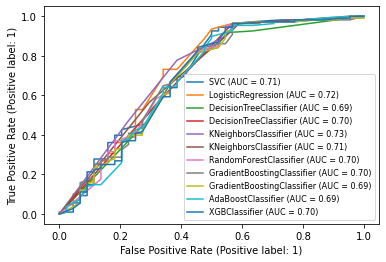

In [254]:
disp=plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt_hyper,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc_hyper,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbt_hyper,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

# Model saving.

In [255]:
import pickle

In [256]:
filename='Loan_status.pkl'
pickle.dump(dt_hyper,open(filename,'wb'))

In [257]:
loaded_model=pickle.load(open('Loan_status.pkl','rb'))
loaded_model.score(x_test,y_test)*100

80.92105263157895

# Conclusion

In [258]:
a=np.array(y_test)
predict=loaded_model.predict(x_test)
b=np.array(predict)
conclusion=pd.DataFrame({'Actual':a,'Predicted':b})
conclusion

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
147,1,1
148,1,1
149,1,1
150,0,0
